# Kraus Vorlesungen

Input ist eine Liste mit Links (Kraus-Online, Wienbibliothek).
https://docs.google.com/spreadsheets/d/1TA2oWFI-tItXiwg3P7Q7qSsSr7cILitSzrzlJxfyUo8/edit#gid=0


## später hier Inhaltsverzeichnis hinzufügen:
* CSV laden, parsen
* Seiten scrapen (Beautiful Soup) und Daten extrahieren --> in eine Tabelle schreiben
* Tabelle --> TEI-Dateien (Gerüst erstellen)
* Material (Pdfs?) herunterladen

## Verwendete Pakete

Das Paket [requests](https://docs.python-requests.org) sendet http-requests. Im konkreten Fall werden mit `GET`-requests Webseiten geladen. Ziel ist es, daraus dann in weiteren Extraktionsschritten Informationen auszulesen. Der folgende Code aktiviert das Paket.

In [9]:
# Package "requests" importieren
import requests

Zur Extraktion der Informationen wird auf das Paket [Beautiful Soup](https://beautiful-soup-4.readthedocs.io) zurückgegriffen. Hiermit können HTML-Dateien eingelesen (geparsed), um dann gezielt Informationen zu entnehmen. Dazu ist es notwendig, zuvor jene Elemente auf der Seite zu identifizieren, die die Informationen enthalten. Dies kann beispielsweise über eine `id` oder eine Klasse `class` erfolgen.

In [10]:
# Package "Beautiful Soup" importieren
from bs4 import BeautifulSoup

Zur Verarbeiten von Dateien im csv-Format wird auf das Paket [csv](https://docs.python.org/3/library/csv.html) verwendet:

In [11]:
# Package "csv" importieren
import csv

Die Funktion `display` aus dem Paket "IPython" wird verwendet, um in diesem Notebook Bilder anzuzeigen.

In [12]:
# Funktion "display" aus dem Package "Ipython" importieren
from IPython import display

XML wird mit dem Paket [etree](https://docs.python.org/3/library/xml.etree.elementtree.html) verarbeitet.

In [42]:
# XML verarbeiten mit etree
import xml.etree.ElementTree as ET

## Exemplarische Beschreibung des Scraping-Vorgangs

Das Scrapen erfolgt in zwei Schritten: zunächst werden die HTML-Seiten geladen, um sie lokal abfragen zu können. Die eigentliche Extraktion erfolgt in einem zweiten Schritt mit dem Paket "Beautiful Soup". 

Zu Demonstrationszwecken wird jeweils eine Seite aus der Wienbibliothek und aus Kraus-Online geladen. 

In [13]:
# Test-Urls:
url_wienbib = "https://www.digital.wienbibliothek.at/wbrobv02/content/titleinfo/1132471"
url_krausonline = "https://www.kraus.wienbibliothek.at/content/173-vorlesung-am-02061920"

Die Seite von Kraus-Online sieht wie folgt aus:

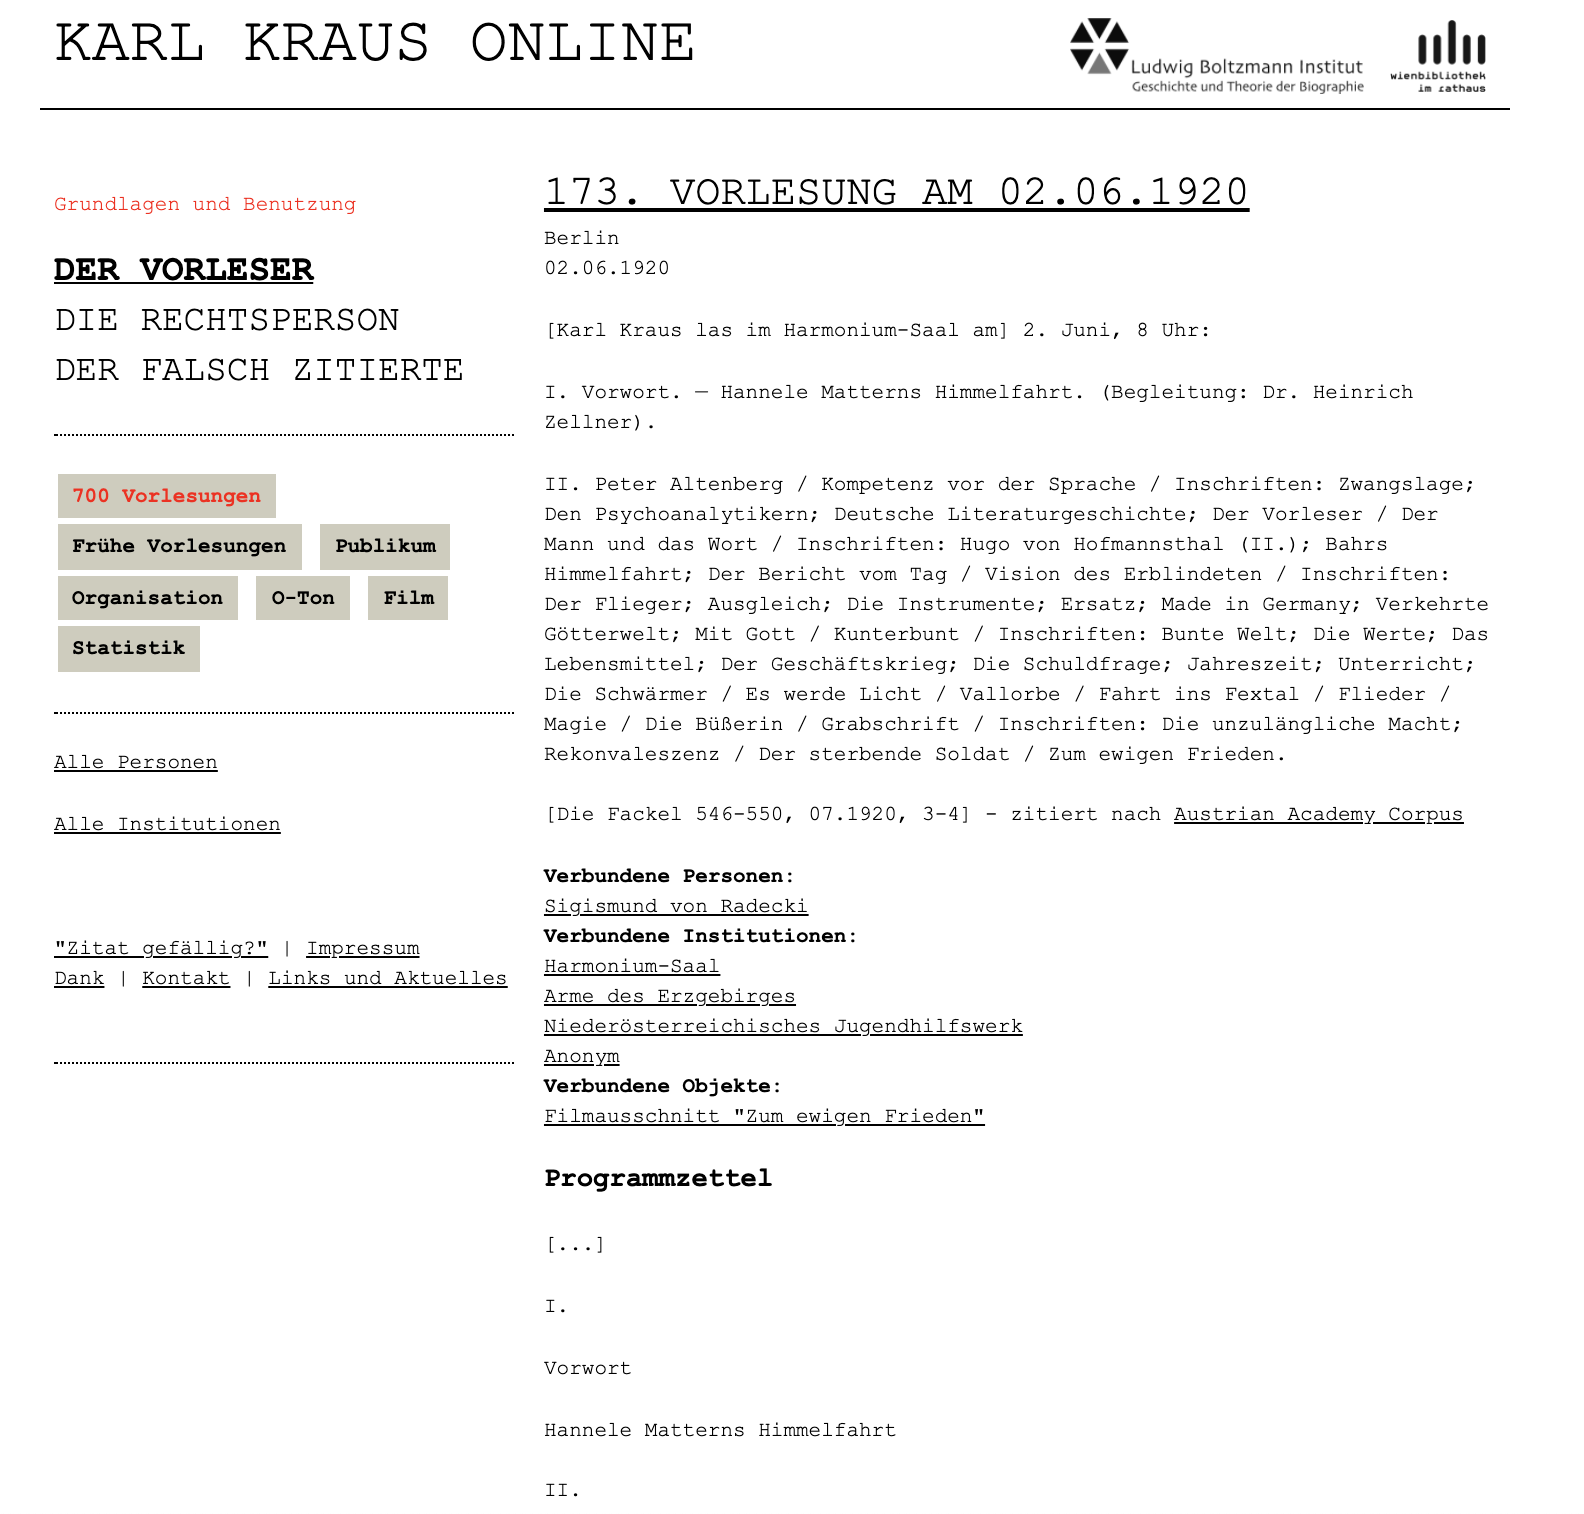

In [30]:
display.Image("./screenshots/screenshot_krausonline_001.png", width=700)

Die Seite der Wienbibliothek sieht wie folgt aus:

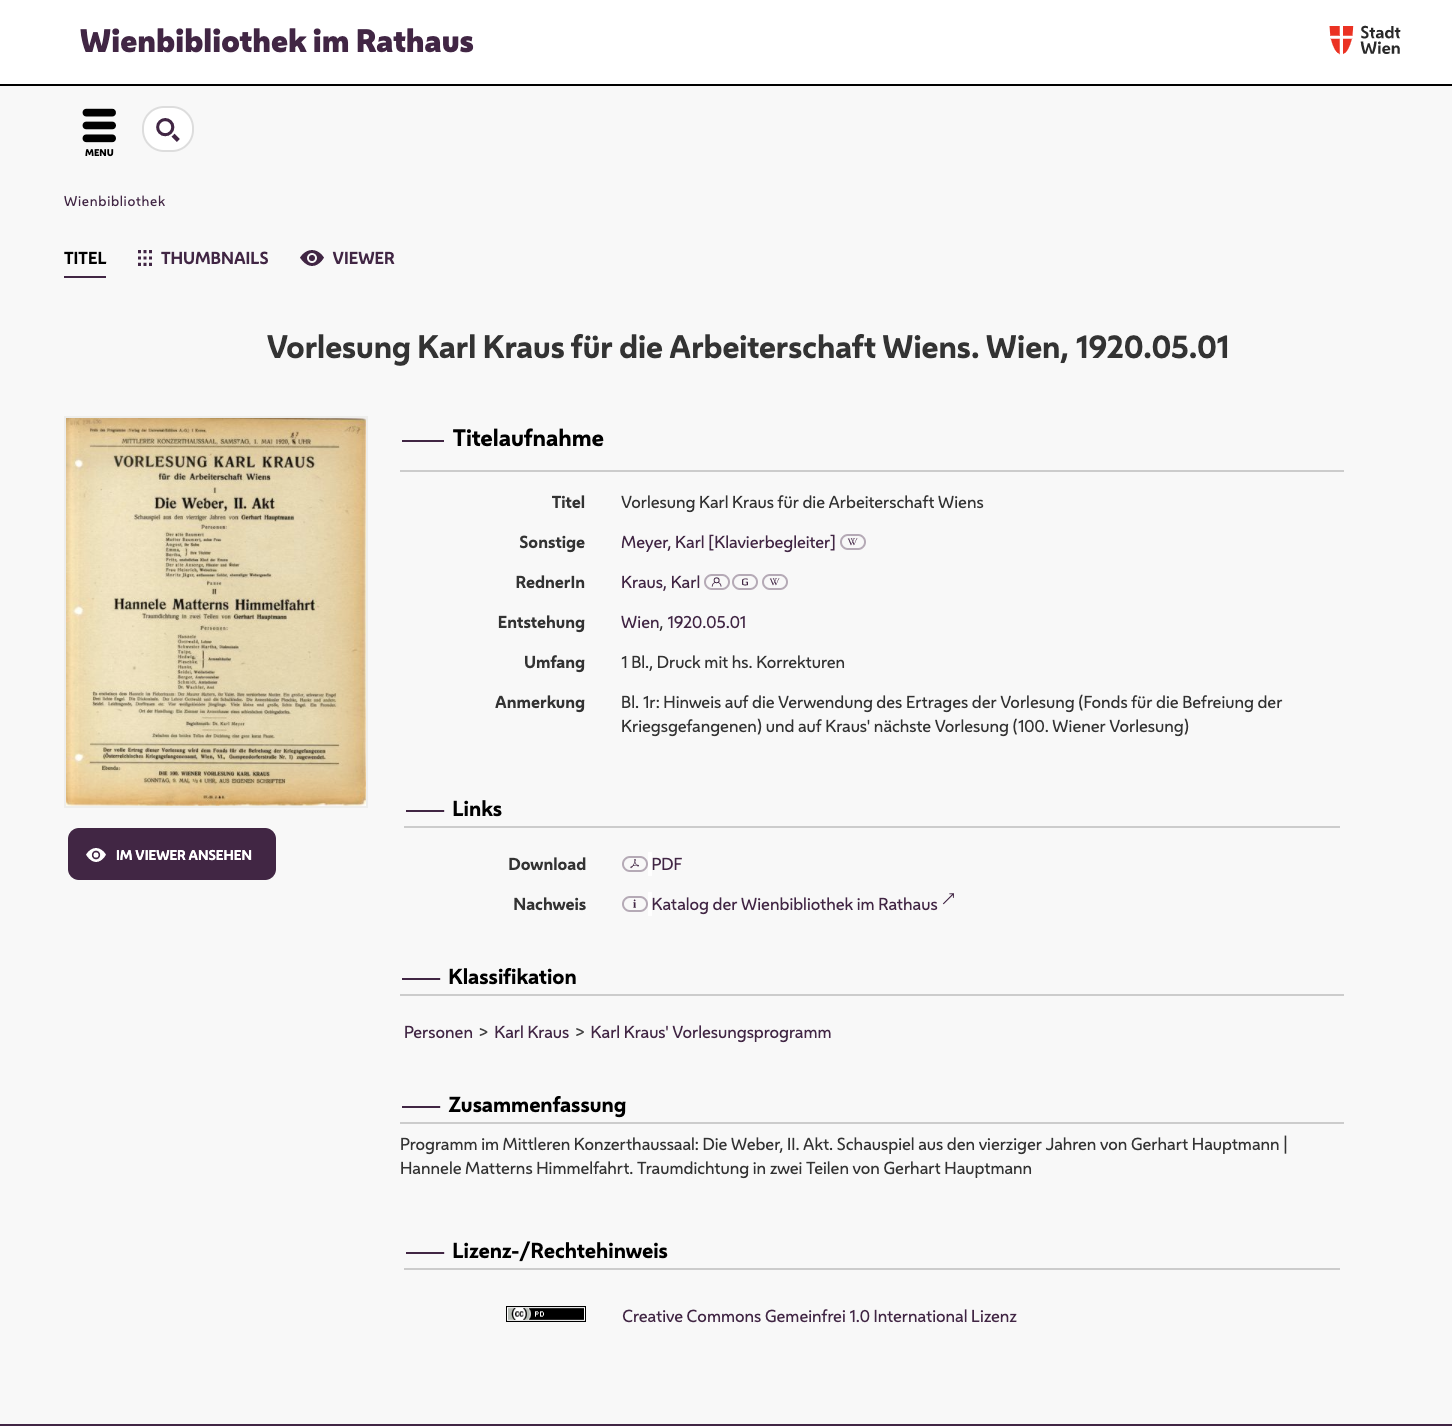

In [34]:
display.Image("./screenshots/screenshot_wienbib_001.png", width=700)

Diese Seite wird mit der Methode `get(url)` geladen, mit der Methode `text` des Request-Objekts wird der Text ausgegeben.

In [31]:
r = requests.get(url_wienbib)
r.status_code
r.text

'<!DOCTYPE html>\n<html lang="de"><head><title>Retrodigitalisierung_Handschriften / Vorlesung Karl Kraus f&#252;r die Arbeiterschaft Wiens</title><meta name="twitter:image" content="http://www.digital.wienbibliothek.at/wbrobv02/download/webcache/304/1132472"/><meta name="twitter:title" content="Vorlesung Karl Kraus f&#252;r die Arbeiterschaft Wiens. Wien, 1920.05.01"/><meta property="og:site" content="Retrodigitalisierung_Handschriften"/><meta property="og:url" content="http://www.digital.wienbibliothek.at/wbrobv02/1132471"/><meta property="og:type" content="book"/><meta property="og:title" content="Vorlesung Karl Kraus f&#252;r die Arbeiterschaft Wiens"/><meta property="og:author" content="Kraus, Karl  "/><meta property="og:author" content="Meyer, Karl [Klavierbegleiter] "/><meta property="book:release_date" content="1920"/><meta property="og:image" content="http://www.digital.wienbibliothek.at/wbrobv02/download/webcache/304/1132472"/><meta property="og:image:width" content="304"/><me

Der Text wird der Variable `html_wienbib` zugewiesen. Anschließend kann dieser mit "Beautiful Soup" geparsed werden.

In [32]:
# html der Seite abspeichern
html_wienbib = r.text
#html der Wienbibliothek parsen
soup = BeautifulSoup(html_wienbib, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="de">
 <head>
  <title>
   Retrodigitalisierung_Handschriften / Vorlesung Karl Kraus für die Arbeiterschaft Wiens
  </title>
  <meta content="http://www.digital.wienbibliothek.at/wbrobv02/download/webcache/304/1132472" name="twitter:image"/>
  <meta content="Vorlesung Karl Kraus für die Arbeiterschaft Wiens. Wien, 1920.05.01" name="twitter:title"/>
  <meta content="Retrodigitalisierung_Handschriften" property="og:site"/>
  <meta content="http://www.digital.wienbibliothek.at/wbrobv02/1132471" property="og:url"/>
  <meta content="book" property="og:type"/>
  <meta content="Vorlesung Karl Kraus für die Arbeiterschaft Wiens" property="og:title"/>
  <meta content="Kraus, Karl  " property="og:author"/>
  <meta content="Meyer, Karl [Klavierbegleiter] " property="og:author"/>
  <meta content="1920" property="book:release_date"/>
  <meta content="http://www.digital.wienbibliothek.at/wbrobv02/download/webcache/304/1132472" property="og:image"/>
  <meta content="304" pr

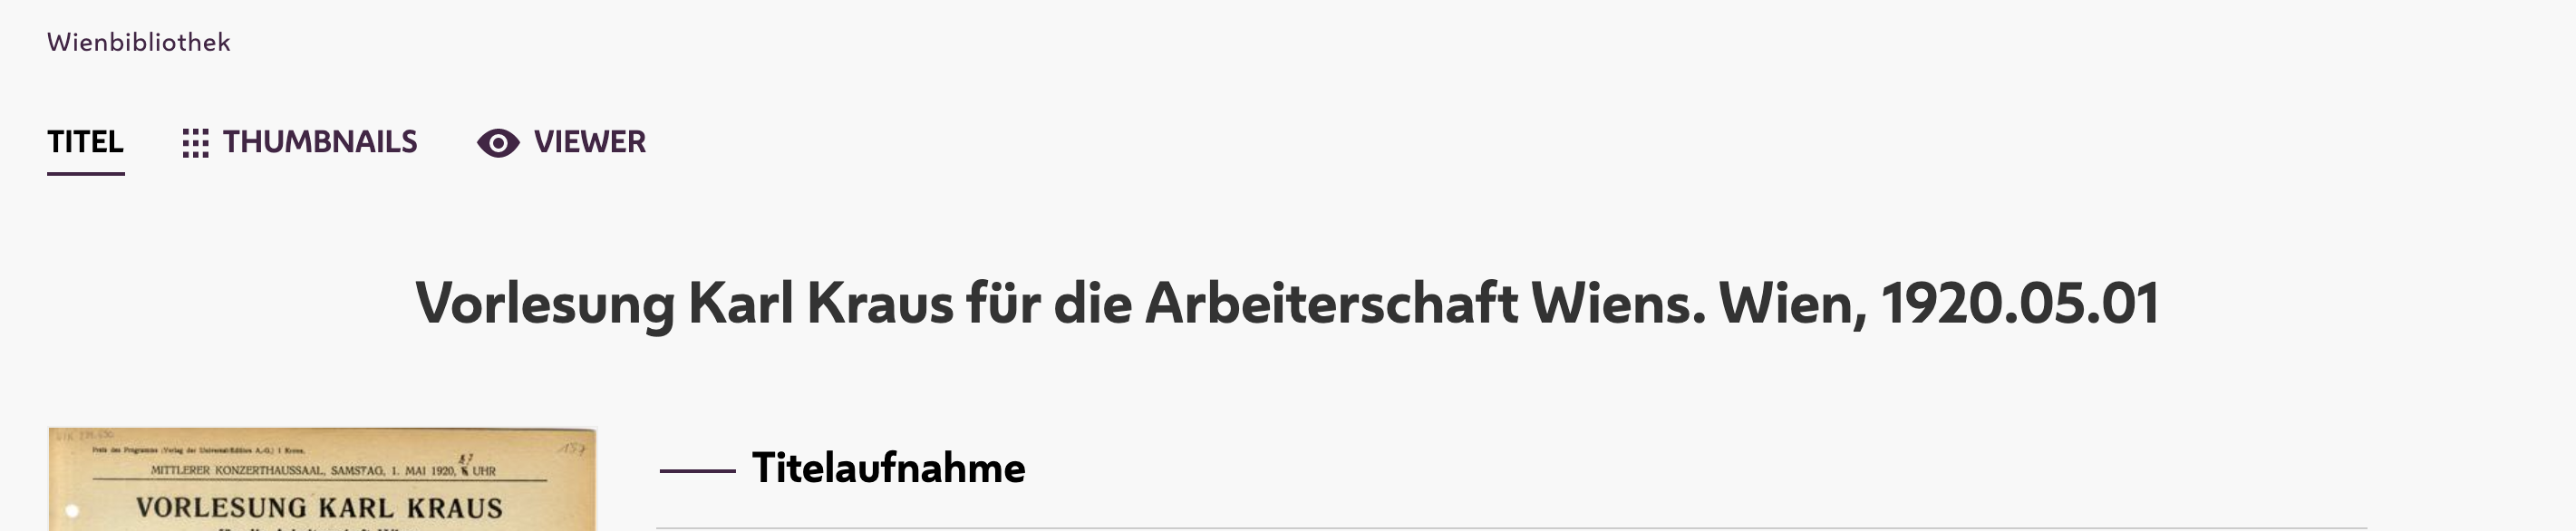

In [36]:
display.Image("./screenshots/screenshot_wienbib_002.png", width=700)

Der Titel des Dokuments findet sich im HTML-Element `<div>` mit der ID `titleHeader`

```
<section>
    <div id="titleHeader">
        Vorlesung Karl Kraus für die Arbeiterschaft Wiens. Wien, 1920.05.01
    </div>
</section>
```

Nun kann der Text des Elements mit dem Wert `"titleHeader"` des Attributs `id` ausgelesen werden.

In [33]:
# finden und text auslesen
soup.find(id="titleHeader").text

'Vorlesung Karl Kraus für die Arbeiterschaft Wiens. Wien, 1920.05.01'

## Funktion, die Wienbib-Seite Infos extrahiert

Der Extraktionsvorgang für alle relevanten Informationen auf der Seite zu einer Vorlesung auf der Webseite der Wienbibliothek wird nun als Funktion implementiert.
Folgende Informationen werden zur weiteren Verarbeitung geladen und in einem Dictionary mit dem Namen `info` abgelegt:

* **ID** key `wienbib_id`: findet sich in der Url nach dem String `/titleinfo/`
* **Titel des Dokuments** key `titleHeader`: findet sich im Element mit der ID `titleHeader`
* **Ort** key `place`: findet sich im Element mit der ID `bib.originPlace`
* **Datum** key `date`: findet sich im Element mit der ID `dc.date`
* **Umfang** key `extent`: hierzu muss zunächst das Element mit der ID `mods_physicalDescriptionExtent` aufgerufen werden und dann darin ein Element `<span>` mit der Klasse `extent` ausgelesen werden
* **Anmerkung** key `anmerkung`: hierzu muss zunächst das Element mit der ID `mods_noteNotType` aufgerufen werden und darin ein Element `<div>` mit der Klasse `note` ausgelesen werden
* **PDF-Downloadlink** key `pdfdownload_url`: hierzu muss zunächst ein Element mit der ID `titleinfoDownloads` aufgerufen werden und darin ein Element `<a>` mit der Klasse `resourceLink` ausgewählt werden. Der Link findet sich im Attribut `href`.
* **OPAC-Link** key `opac_url`: hierzu muss zunächst ein Element mit der ID `titleinfoLinksOpac` aufgerufen werden und darin ein Element `<div>` mit der Klasse `opacLink` ausgewählt werden. Die URL findet sich im Attribut `href` des darin befindlichen Elementes `<a>`.
* **Zusammenfassung** key `zusammenfassung`: hier wird zunächst das Element mit der ID `titleInfoAbstract` abgefragt. Die Information findet sich in dem darin enthaltenen Element `<p>` 
* **Beteiligte** key `beteiligte`: die Namen der beteiligten Personen finden sich in `<div>`-Elementen, denen die Klasse `value` zugewiesen ist, innerhalb eines Elements mit der ID `mods_name-roleTerm_Other`. Mit einer Schleife werden die Einträge ausgelesen und in einem Dictionary hinzugefügt. Ein Personeneintrag enthält unter dem Key `name` den Wert des Elements mit der ID `bib.personalName` und unter dem Key `wienwiki_url` den Wert des Elements `wikipediaLink`.

In [25]:
# Beispiel für das URL-Splitting:
print(url_wienbib)
url_wienbib.split('/titleinfo/')[1] #zweites Element der Liste

https://www.digital.wienbibliothek.at/wbrobv02/content/titleinfo/1132471


'1132471'

In [37]:
def get_wienbib_info(url):
    #Seite laden
    r = requests.get(url)
    html_wienbib = r.text
    
    # parsen
    soup = BeautifulSoup(html_wienbib, 'html.parser')
    
    # leeres dictionary, das die Infos enthalten wird:
    info = {}
    
    # Url aufnehmen
    info["wienbib_url"] = url
    
    # ID
    info["wienbib_id"] = url.split("/titleinfo/")[1]
    
    # Titel des Dokuments: id="titleHeader"
    try:
        info["titleHeader"] = soup.find(id="titleHeader").text
    except:
        info["titleHeader"] = None
    
    # Ort: id = "bib.originPlace"
    try:
        info["place"] = soup.find(id="bib.originPlace").text
    except:
        info["place"] = None
    
    # Datum: id=dc.date
    try:
        info["date"] = soup.find(id="dc.date").text
    except:
        info["date"] = None
    
    # Umfang id=extent
    try:
        info["extent"] = soup.find(id="mods_physicalDescriptionExtent").find("span",class_="extent").text
    except:
        info["extent"] = None
    
    # Anmerkung id="mods_noteNotType"
    try:
        info["anmerkung"] = soup.find(id="mods_noteNotType").find("div",class_="note").text
    except:
        info["anmerkung"] = None
    
    # PDF-Download-Link titleinfoDownloads
    try:
        pdfdownload_url = soup.find(id="titleinfoDownloads").find("a",class_="resourceLink").get("href")
        info["pdfdownload_url"] = "https://www.digital.wienbibliothek.at" + pdfdownload_url
    except:
        info["pdfdownload_url"] = None
        
    
    # OPAC-Link "titleinfoLinksOpac"
    try:
        opac_url = soup.find(id="titleinfoLinksOpac").find("div",class_="opacLink").a.get("href")
        info["opac_url"] = opac_url
    except:
        info["opac_url"] = None
    
    # Zusammenfassung "titleInfoAbstract"
    try:
        info["zusammenfassung"] = soup.find(id="titleInfoAbstract").find("p").text
    except:
        info["zusammenfassung"] = None
    
    # Beteiligte
    try:
        beteiligte_elems = soup.find(id="mods_name-roleTerm_Other").find_all("div", class_="value")
        info["beteiligte"] = []
        for beteiligte_elem in beteiligte_elems:
            beteiligter_dict = {}
            beteiligter_dict["name"] = beteiligte_elem.find(id="bib.personalName").text
            try:
                beteiligter_dict["wienwiki_url"] = beteiligte_elem.find(id="wikipediaLink").get("href")
            except: return
            info["beteiligte"].append(beteiligter_dict)
           
    except:
        info["beteiligte"] = None
        
    
    return info
    
    

In [38]:
# testen
get_wienbib_info(url_wienbib)

{'wienbib_url': 'https://www.digital.wienbibliothek.at/wbrobv02/content/titleinfo/1132471',
 'wienbib_id': '1132471',
 'titleHeader': 'Vorlesung Karl Kraus für die Arbeiterschaft Wiens. Wien, 1920.05.01',
 'place': 'Wien',
 'date': '1920.05.01',
 'extent': '1 Bl., Druck mit hs. Korrekturen',
 'anmerkung': "Bl. 1r: Hinweis auf die Verwendung des Ertrages der Vorlesung (Fonds für die Befreiung der Kriegsgefangenen) und auf Kraus' nächste Vorlesung (100. Wiener Vorlesung)",
 'pdfdownload_url': 'https://www.digital.wienbibliothek.at/download/pdf/1132471?name=Vorlesung%20Karl%20Kraus%20f%C3%BCr%20die%20Arbeiterschaft%20Wiens',
 'opac_url': 'https://permalink.obvsg.at/wbr/AC15966725',
 'zusammenfassung': 'Programm im Mittleren Konzerthaussaal: Die Weber, II. Akt. Schauspiel aus den vierziger Jahren von Gerhart Hauptmann | Hannele Matterns Himmelfahrt. Traumdichtung in zwei Teilen von Gerhart Hauptmann',
 'beteiligte': [{'name': 'Meyer, Karl [Klavierbegleiter] ',
   'wienwiki_url': 'http://ww

## Funktion, die Informationen aus Kraus-online extrahiert

Der Extraktionsvorgang für alle relevanten Informationen auf der Seite zu einer Vorlesung auf der Webseite Kraus-Online wird nun als Funktion implementiert. Folgende Informationen werden zur weiteren Verarbeitung geladen und in einem Dictionary mit dem Namen info abgelegt:

* **URL der Webseite** key `krausonline_url`: URL, die übergeben wird
* **Titel** key `title`: findet sich im Element mit der ID `page-title`
* **Ort** key `place`: in einem `<div>`-Element, welches der Klasse `field-name-field-place-text` findet sich ein div-Element, das die Klasse `field-item` aufweist; Text wird extrahiert;
* **Datum** key `date`: in einem `<div>`-Element, welches der Klasse `field-type-biodate` zugewiesen ist, findet sich ein div-Element mit der Klasse `field-item`; Text wird extrahiert;
* **Zusammenfassung** key `summary_paragraphs`: in einem `<div>`-Element mit der Klasse `field-type-text-with-summary` werden alle Elemente `<p>` gesucht und in einer Liste gespeichert. Jedes vorhandene Element `<p>` wird in der Liste ergänzt.
* **Verknüpfte Institutionen** key `institutions`: gesucht werden in einem `<div>`-Element mit der Klasse `field-name-field-related-institutionen` Elemente `<div>` mit der Klasse `field-item`. Zu jedem Instiutionen-Eintrag werden in einem Dictionary die Felder `name` und `link` befüllt. Der Name der Institution findet sich im Text des enthaltenen Elements `<a>`, der Link auf den Personeneintrag wird als absoluter Link aus der URL von Kraus-Online und dem im HTML aufgenommenen relativen Link aus dem Attribut `href` zusammengesetzt.
* **Kurzlink** key `shortlink`: gesucht wird ein Element `<link>` mit dem Attribut `rel`und dem Wert `shortlink`. Die relative URL findet sich im Attribut `href`. Dieser Wert wird in einen absoluten Wert umgewandelt. 
* **Kraus-Online ID (node-ID in der Datenbank)** key `krausonline_id`: Ausgehend vom Kurzlink wird die node-ID extrahiert, indem der String gesplittet wird und das zweite Element gespeichert wird. 
* **Transskript des Vorlesungsprogramms** key `vorlesungsprogramm-transkript`: gesucht wird in einem `<div>`-Element mit der Klasse `vorlesungsprogramm` alle `<p>`-Elemente, die anschließend in einer Liste gespeichert werden; Achtung: hierbei handelt es sich nicht um ein vollständiges Transskript, sondern um ein auszugsweises Tranksskript;
* **Verknüpfte Personen** key `persons`: gesucht werden in einem `<div>`-Element mit der Klasse `field-name-field-related-persons` Elemente `<div>` mit der Klasse `field-item`. Zu jedem Personen-Eintrag werden in einem Dictionary die Felder `name` und `link` befüllt. Der Name der Person findet sich im Text des enthaltenen Elements `<a>`, der Link auf den Personeneintrag wird als absoluter Link aus der URL von Kraus-Online und dem im HTML aufgenommenen relativen Link aus dem Attribut `href` zusammengesetzt.
* **Verknüpfte Objekte** key `objects`: gesucht werden in einem `<div>`-Element mit der Klasse `field-name-field-related-objects` Elemente `<div>` mit der Klasse `field-item`. Zu jedem Objekt-Eintrag werden in einem Dictionary die Felder `name`und `link` befüllt. Die Bezeichnung des Objekts findet sich im Text des enthaltenen Elements `<a>`, der Link auf das Objekt wird als absoluter Link aus deR URL von Kraus-Online und dem im HTML aufgenommenen relativen Link aus dem Attribut `href` zusammengesetzt. 

In [11]:
def get_krausonline_info(url):
    #Seite laden
    r = requests.get(url)
    html_krausonline = r.text
    
    # parsen
    soup = BeautifulSoup(html_krausonline, 'html.parser')
    
    # leeres dictionary, das die Infos enthalten wird:
    info = {}
    
      # Url aufnehmen
    info["krausonline_url"] = url
    
    # page-title Page-Title AH: umschreiben / Code schlanker machen
    try:
        info["title"] = soup.find(id="page-title").text
    except:
        info["title"] = None
    
    # field-name-field-place-text
    try:
        info["place"] = soup.find("div",class_="field-name-field-place-text").find("div", class_="field-item").text
    except:
        info["place"] = None
    
    #datum field-name-field-biodate
    try:
        info["date"] = soup.find("div",class_="field-type-biodate").find("div", class_="field-item").text
    except:
        info["date"] = None
    
    
    #datum field-type-text-with-summary
    try:
        summary_ps = soup.find("div",class_="field-type-text-with-summary").find_all("p")
        p_texte = []
        for p in summary_ps:
            p_texte.append(p.text)
        info["summary_paragraphs"] = p_texte   
    except:
        info["summary_paragraphs"] = None
        
    #Verbundene Institutionen "field-name-field-related-institutionen"
    try:
        institutions_elems = soup.find("div",class_="field-name-field-related-institutionen").find_all("div",class_="field-item")
        institutions = []
        for institution_elem in institutions_elems:
            institution_name = institution_elem.a.text
            institution_link = institution_elem.a.get("href")
            institution = {}
            institution["name"] = institution_name
            institution["link"] = "https://www.kraus.wienbibliothek.at" + institution_link
            institutions.append(institution)
        info["institutions"] = institutions
    except:
        info["institutions"] = None
        
    # node-id <link rel="shortlink" href="/node/20473" />
    try:
        shortlink = soup.find("link", {"rel" : "shortlink"}).get("href")
        info["shortlink"] = "https://www.kraus.wienbibliothek.at" + shortlink
        info["krausonline_id"] = shortlink.split("/node/")[1]
    except:
        info["shortlink"] = None
        info["krausonline_id"] = None
        
    
    # transkript class="vorlesungsprogramm"
    try:
        vorlesungsprogram_elem = soup.find("div", class_="vorlesungsprogramm")
        vorlesungsprogramm_ps = vorlesungsprogram_elem.find_all("p")
        vorlesungsprogramm_transkript_ps = []
        for vorlesungsprogramm_p in vorlesungsprogramm_ps:
            vorlesungsprogramm_transkript_p_text = vorlesungsprogramm_p.text
            vorlesungsprogramm_transkript_ps.append(vorlesungsprogramm_transkript_p_text)
    
        info["vorlesungsprogramm-transkript"] = vorlesungsprogramm_transkript_ps
    except:
        info["vorlesungsprogramm-transkript"] = None
    
    
    # verbundene Personen class=field-name-field-related-persons
    try:
        persons_elems = soup.find("div",class_="field-name-field-related-persons").find_all("div",class_="field-item")
        persons = []
        for person_elem in persons_elems:
            person_name = person_elem.a.text
            person_link = person_elem.a.get("href")
            person = {}
            person["name"] = person_name
            person["link"] = "https://www.kraus.wienbibliothek.at" + person_link
            persons.append(person)
        info["persons"] = persons
    except:
        info["persons"] = None 
    
    # verbundene Objekte field-name-field-related-objects
    try:
        objects_elems = soup.find("div",class_="field-name-field-related-objects").find_all("div",class_="field-item")
        objects = []
        for object_elem in objects_elems:
            object_name = object_elem.a.text
            object_link = object_elem.a.get("href")
            a_object = {}
            a_object["name"] = object_name
            a_object["link"] = "https://www.kraus.wienbibliothek.at" + object_link
            objects.append(a_object)
        info["objects"] = objects
    except:
        info["objects"] = None 
  
    
    return info

In [119]:
# testen
get_krausonline_info(url_krausonline)

{'date': '02.06.1920\n',
 'institutions': [{'link': 'https://www.kraus.wienbibliothek.at/content/harmonium-saal',
   'name': 'Harmonium-Saal'},
  {'link': 'https://www.kraus.wienbibliothek.at/content/arme-des-erzgebirges',
   'name': 'Arme des Erzgebirges'},
  {'link': 'https://www.kraus.wienbibliothek.at/content/niederoesterreichisches-jugendhilfswerk',
   'name': 'Niederösterreichisches Jugendhilfswerk'},
  {'link': 'https://www.kraus.wienbibliothek.at/content/anonym',
   'name': 'Anonym'}],
 'krausonline_id': '7694',
 'krausonline_url': 'https://www.kraus.wienbibliothek.at/content/173-vorlesung-am-02061920',
 'objects': [{'link': 'https://www.kraus.wienbibliothek.at/content/filmausschnitt-zum-ewigen-frieden',
   'name': 'Filmausschnitt "Zum ewigen Frieden"'}],
 'persons': [{'link': 'https://www.kraus.wienbibliothek.at/person/sigismund-von-radecki',
   'name': 'Sigismund von Radecki'}],
 'place': 'Berlin',
 'shortlink': 'https://www.kraus.wienbibliothek.at/node/7694',
 'summary_parag

## Funktion, die OPAC Info extrahiert

Neben den Ansichten auf der Seite der Wienbilbiothek und Kraus-Online gibt es auch einen entsprechenden Katalogeintrag (OPAC) zum Dokument. Das verwendete Bibliothekssystem (ALMA) verfügt über eine SRU-Schnittstelle. Über diesen Endpoint lassen sich die Katalogdaten im MARC-XML-Format abfragen. Folgende Funktion bietet eine Abfrage basierend auf der URL des Web-Frontends des OPAC wie sie von der Funktion `get_wienbib_info` extrahiert und im entsprechenden Dictionary unter dem key `opac_url` abgelegt ist.

In [46]:
# Funktion, die OPAC-URL in SRU-Link umwandelt
def opac_url_to_sru(url):
    opac_id =  url.split('https://permalink.obvsg.at/wbr/')[1]
    sru_url = "https://obv-at-oenb.alma.exlibrisgroup.com/view/sru/43ACC_WIENB?version=1.2&query=alma.local_control_field_009=" + opac_id + "&operation=searchRetrieve"
    return sru_url
    

In [49]:
#testen
opac_url = "https://permalink.obvsg.at/wbr/AC15966725"
opac_url_to_sru(opac_url)

'https://obv-at-oenb.alma.exlibrisgroup.com/view/sru/43ACC_WIENB?version=1.2&query=alma.local_control_field_009=AC15966725&operation=searchRetrieve'

In [47]:
#url, wie sie aus der wienbib-Funktion kommt
def get_opac_info(url):
    sru_url = opac_url_to_sru(url)
    r = requests.get(sru_url)
    # liefert XML zurück, das man muss parsen. Erfolgt mit dem Package etree 

    root = ET.fromstring(r.text)

    return root

In [48]:
#testen
opac_url = "https://permalink.obvsg.at/wbr/AC15966725"
test_xml = get_opac_info(opac_url)
ET.dump(test_xml)

<ns0:searchRetrieveResponse xmlns:ns0="http://www.loc.gov/zing/srw/" xmlns:ns1="http://www.loc.gov/MARC21/slim" xmlns:ns2="http://www.exlibris.com/repository/search/xmlbeans/">
  <ns0:version>1.2</ns0:version>
  <ns0:numberOfRecords>1</ns0:numberOfRecords>
  <ns0:records>
    <ns0:record>
      <ns0:recordSchema>marcxml</ns0:recordSchema>
      <ns0:recordPacking>xml</ns0:recordPacking>
      <ns0:recordData>
        <ns1:record>
          <ns1:leader>01509ntm a2200373 cb4500</ns1:leader>
          <ns1:controlfield tag="001">9910703754504516</ns1:controlfield>
          <ns1:controlfield tag="005">20201012150646.0</ns1:controlfield>
          <ns1:controlfield tag="007">tu</ns1:controlfield>
          <ns1:controlfield tag="008">130212|1920####xx############|||#|#ger#c</ns1:controlfield>
          <ns1:controlfield tag="009">AC15966725</ns1:controlfield>
          <ns1:datafield ind1=" " ind2=" " tag="035">
            <ns1:subfield code="a">(AT-OBV)AC15966725</ns1:subfield>
         

## Tabelle einlesen und Daten holen

In [129]:
krauslesen = {}
errors = []
with open('krauslesen_alle_links.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    n = 0
    for row in reader:
        if n > 1: # hier ist der Fehler, weshalb der erste Eintrag nicht da ist
            item = {}
            kk_id = row[1]
            print(kk_id)
            date = row[2]
            url_wienbib = row[3]
            url_krausonline = row[4]
            
            item["id"] = kk_id
            item["date"] = date
            item["url_wienbib"] = url_wienbib
            item["url_krausonline"] = url_krausonline
            
            try:
                krausonline_data = get_krausonline_info(url_krausonline)
                item["data_krausonline"] = krausonline_data
                print ("krausonline ok")
            except:
                errors.append(kk_id)
            
            try:
                wienbib_data = get_wienbib_info(url_wienbib)
                item["data_wienbib"] = wienbib_data
                print("wienbib ok")
            except:
                errors.append(kk_id)
            
            
            
            # zum Hauptdictionary hinzu
            krauslesen[kk_id] = item
            
            
            
            
        else:
            None
        n = n + 1
        
        

kkvo_1920-01-11
krausonline ok
wienbib ok
kkvo_1920-01-20
krausonline ok
wienbib ok
kkvo_1920-01-21
krausonline ok
wienbib ok
kkvo_1920-01-22
krausonline ok
wienbib ok
kkvo_1920-01-27
krausonline ok
wienbib ok
kkvo_1920-01-29
krausonline ok
wienbib ok
kkvo_1920-02-04
krausonline ok
wienbib ok
kkvo_1920-02-15
krausonline ok
wienbib ok
kkvo_1920-03-07
krausonline ok
wienbib ok
kkvo_1920-03-14
krausonline ok
wienbib ok
kkvo_1920-03-28
krausonline ok
wienbib ok
kkvo_1920-04-06
krausonline ok
wienbib ok
kkvo_1920-04-11
krausonline ok
wienbib ok
kkvo_1920-04-18
krausonline ok
wienbib ok
kkvo_1920-05-01
krausonline ok
wienbib ok
kkvo_1920-05-09
krausonline ok
wienbib ok
kkvo_1920-05-28
krausonline ok
wienbib ok
kkvo_1920-05-29
krausonline ok
wienbib ok
kkvo_1920-05-31
krausonline ok
wienbib ok
kkvo_1920-06-02
krausonline ok
wienbib ok
kkvo_1920-06-04
krausonline ok
wienbib ok
kkvo_1920-06-11
krausonline ok
wienbib ok
kkvo_1920-06-12
krausonline ok
wienbib ok
kkvo_1920-06-14
krausonline ok
wie

In [130]:
krauslesen

{'kkvo_1920-01-11': {'data_krausonline': {'date': '11.01.1920\n',
   'institutions': [{'link': 'https://www.kraus.wienbibliothek.at/content/wiener-konzerthaus',
     'name': 'Wiener Konzerthaus'},
    {'link': 'https://www.kraus.wienbibliothek.at/content/kinderausspeisung',
     'name': 'Kinderausspeisung'}],
   'krausonline_id': '7658',
   'krausonline_url': 'https://www.kraus.wienbibliothek.at/content/154-vorlesung-am-11011920',
   'objects': [],
   'persons': None,
   'place': 'Wien',
   'shortlink': 'https://www.kraus.wienbibliothek.at/node/7658',
   'summary_paragraphs': ['[Karl Kraus las im Mittleren Konzerthaussaal am] 11. Januar, ½3 Uhr:',
    'I. Lammasch und die Christen.',
    'Gerhart Hauptmann, »Die Weber« I. und II. Akt.',
    'II. »Die Weber«, IV. Akt.',
    'Gebet an die Sonne von Gibeon.',
    'Die Hälfte des Ertrags für die Kinderausspeisung.',
    '[Die Fackel 521-530, 01.1920, 98] - zitiert nach  Austrian Academy Corpus '],
   'title': '154. Vorlesung am 11.01.1920'

### Speichern

In [131]:
import json
output = open("krauslesen.json", "w")
json.dump(krauslesen, output)
output.close()

## pdfs laden und benennen

In [144]:
for key in krauslesen.keys():
    urlpart = krauslesen[key]["data_wienbib"]["pdfdownload_url"].split("?")[0]
    pdfdownloadurl = urlpart + "?name=" + key
    filename = key + ".pdf"
    !wget -O {filename}  {pdfdownloadurl}


--2021-07-26 17:26:42--  https://www.digital.wienbibliothek.at/download/pdf/1132421?name=kkvo_1920-01-11
Auflösen des Hostnamens www.digital.wienbibliothek.at (www.digital.wienbibliothek.at)… 195.37.242.132
Verbindungsaufbau zu www.digital.wienbibliothek.at (www.digital.wienbibliothek.at)|195.37.242.132|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 200 OK
Länge: 399898 (391K) [application/pdf]
Wird in »kkvo_1920-01-11.pdf« gespeichert.

kkvo_1920-01-11.pdf 100%[===================>] 390,53K  1,26MB/s    in 0,3s    

2021-07-26 17:26:43 (1,26 MB/s) - »kkvo_1920-01-11.pdf« gespeichert [399898/399898]

--2021-07-26 17:26:43--  https://www.digital.wienbibliothek.at/download/pdf/1132425?name=kkvo_1920-01-20
Auflösen des Hostnamens www.digital.wienbibliothek.at (www.digital.wienbibliothek.at)… 195.37.242.132
Verbindungsaufbau zu www.digital.wienbibliothek.at (www.digital.wienbibliothek.at)|195.37.242.132|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird

--2021-07-26 17:26:49--  https://www.digital.wienbibliothek.at/download/pdf/1132467?name=kkvo_1920-04-18
Auflösen des Hostnamens www.digital.wienbibliothek.at (www.digital.wienbibliothek.at)… 195.37.242.132
Verbindungsaufbau zu www.digital.wienbibliothek.at (www.digital.wienbibliothek.at)|195.37.242.132|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 200 OK
Länge: 232452 (227K) [application/pdf]
Wird in »kkvo_1920-04-18.pdf« gespeichert.

kkvo_1920-04-18.pdf 100%[===================>] 227,00K   906KB/s    in 0,3s    

2021-07-26 17:26:50 (906 KB/s) - »kkvo_1920-04-18.pdf« gespeichert [232452/232452]

--2021-07-26 17:26:50--  https://www.digital.wienbibliothek.at/download/pdf/1132471?name=kkvo_1920-05-01
Auflösen des Hostnamens www.digital.wienbibliothek.at (www.digital.wienbibliothek.at)… 195.37.242.132
Verbindungsaufbau zu www.digital.wienbibliothek.at (www.digital.wienbibliothek.at)|195.37.242.132|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird 

--2021-07-26 17:26:57--  https://www.digital.wienbibliothek.at/download/pdf/1132509?name=kkvo_1920-10-21
Auflösen des Hostnamens www.digital.wienbibliothek.at (www.digital.wienbibliothek.at)… 195.37.242.132
Verbindungsaufbau zu www.digital.wienbibliothek.at (www.digital.wienbibliothek.at)|195.37.242.132|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 200 OK
Länge: 278088 (272K) [application/pdf]
Wird in »kkvo_1920-10-21.pdf« gespeichert.

kkvo_1920-10-21.pdf 100%[===================>] 271,57K  1,00MB/s    in 0,3s    

2021-07-26 17:26:57 (1,00 MB/s) - »kkvo_1920-10-21.pdf« gespeichert [278088/278088]

--2021-07-26 17:26:57--  https://www.digital.wienbibliothek.at/download/pdf/1132513?name=kkvo_1920-11-01
Auflösen des Hostnamens www.digital.wienbibliothek.at (www.digital.wienbibliothek.at)… 195.37.242.132
Verbindungsaufbau zu www.digital.wienbibliothek.at (www.digital.wienbibliothek.at)|195.37.242.132|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird

## Anreicherung

### Fackel-Links

Muster Permalinks von ÖAW AAC:
https://fackel.oeaw.ac.at/f/521,093

In [178]:
for key in krauslesen.keys():
    fackelCandidateString = krauslesen[key]["data_krausonline"]["summary_paragraphs"][-1].split('] - ')[0].replace("[","")
    if ("Die Fackel" in fackelCandidateString):
        fackeldata = {}
        fackeldata["krausonline_bibl"] = fackelCandidateString
        issue = fackelCandidateString.split(",")[0].replace("Die Fackel ","")
        fackeldata["issue"] = issue
        cleaned_issue = issue.split("-")[0]
        pp = fackelCandidateString.split(", ")[-1]
        fackeldata["pp"] = pp
        startpage = pp.split("-")[0]
        fackeldata["startpage"] = startpage
        if "-" in pp:
            fackeldata["onSinglePage"] = False
        else:
            fackeldata["onSinglePage"] = True
            
        if (len(startpage)== 1 ):
            pagenumber = "00" + startpage
        elif (len(startpage) == 2):
            pagenumber = "0" + startpage
        else:
            pagenumber = startpage
        fackelpermalink_start = "https://fackel.oeaw.ac.at/f/" + issue + "," + pagenumber
        
        fackeldata["permalink_start"] = fackelpermalink_start
        if "-" in pp :
            secondPage = pp.split("-")[1]
            if (len(secondPage)== 1 ):
                endpage = "00" + secondPage
            elif (len(secondPage) == 2):
                endpage = "0" + secondPage
            else:
                endpage = secondPage
            
            fackelpermalink_end = "https://fackel.oeaw.ac.at/f/" + issue + "," + endpage
            permalinks = [fackelpermalink_start, fackelpermalink_end]
        else:
            permalinks = [fackelpermalink_start]
        
        
        fackeldata["permalinks"] = permalinks
        
        print(fackeldata)
        
        #add to krauslesen
        krauslesen[key]["fackel"] = fackeldata
    

{'krausonline_bibl': 'Die Fackel 521-530, 01.1920, 98', 'issue': '521-530', 'pp': '98', 'startpage': '98', 'onSinglePage': True, 'permalink_start': 'https://fackel.oeaw.ac.at/f/521-530,098', 'permalinks': ['https://fackel.oeaw.ac.at/f/521-530,098']}
{'krausonline_bibl': 'Die Fackel 531-543, 04.1920, 23', 'issue': '531-543', 'pp': '23', 'startpage': '23', 'onSinglePage': True, 'permalink_start': 'https://fackel.oeaw.ac.at/f/531-543,023', 'permalinks': ['https://fackel.oeaw.ac.at/f/531-543,023']}
{'krausonline_bibl': 'Die Fackel 531-543, 04.1920, 35', 'issue': '531-543', 'pp': '35', 'startpage': '35', 'onSinglePage': True, 'permalink_start': 'https://fackel.oeaw.ac.at/f/531-543,035', 'permalinks': ['https://fackel.oeaw.ac.at/f/531-543,035']}
{'krausonline_bibl': 'Die Fackel 531-543, 04.1920, 35', 'issue': '531-543', 'pp': '35', 'startpage': '35', 'onSinglePage': True, 'permalink_start': 'https://fackel.oeaw.ac.at/f/531-543,035', 'permalinks': ['https://fackel.oeaw.ac.at/f/531-543,035']}


In [179]:
# speichern mit Änderungen
output = open("krauslesen_enriched.json", "w")
json.dump(krauslesen, output)
output.close()

### Werke aus den Wienbibliothek-Daten extrahieren

Im Feld "Zusammenfassung":

Programm im Mittleren Konzerthaussaal: Die Weber, II. Akt. Schauspiel aus den vierziger Jahren von Gerhart Hauptmann | Hannele Matterns Himmelfahrt. Traumdichtung in zwei Teilen von Gerhart Hauptmann

abgelegt in einer Liste `wienbib_mentionedWorks`; die muss händisch gecleaned werden; deswegen csv zum Import in OpenRefine erstellt.


In [201]:
wienbib_mentionedWorks = []
for key in krauslesen.keys():
    zusammenfassung = krauslesen[key]["data_wienbib"]["zusammenfassung"]
    werke = zusammenfassung.split("|")
    pos = 1
    for werkstring in werke:
        
        werk_dict = {}
        werk_clean = werkstring.lstrip().rstrip()
        werk_dict["name"] = werk_clean.replace(";",",")
        werk_dict["posInList"] = pos
        werk_dict["mentionedInDescOf"] = key
        werk_dict["quelle"] = krauslesen[key]["data_wienbib"]["wienbib_url"]
        print(werk_dict)
        wienbib_mentionedWorks.append(werk_dict)
        pos = pos + 1        

{'name': 'Programm im Mittleren Konzerthaussaal: Lammasch und die Christen (Manuskript)', 'posInList': 1, 'mentionedInDescOf': 'kkvo_1920-01-11', 'quelle': 'https://www.digital.wienbibliothek.at/wbrobv02/content/titleinfo/1132421'}
{'name': 'Aus: Die Weber. Schauspiel aus den vierziger Jahren von Gerhart Hauptmann', 'posInList': 2, 'mentionedInDescOf': 'kkvo_1920-01-11', 'quelle': 'https://www.digital.wienbibliothek.at/wbrobv02/content/titleinfo/1132421'}
{'name': 'Gebet an die Sonne von Gibeon', 'posInList': 3, 'mentionedInDescOf': 'kkvo_1920-01-11', 'quelle': 'https://www.digital.wienbibliothek.at/wbrobv02/content/titleinfo/1132421'}
{'name': 'Programm im Klindworth-Scharwenka-Saal: Monolog des Nörglers (Schluss)', 'posInList': 1, 'mentionedInDescOf': 'kkvo_1920-01-20', 'quelle': 'https://www.digital.wienbibliothek.at/wbrobv02/content/titleinfo/1132425'}
{'name': 'Oberndorff und die Schriftleiter', 'posInList': 2, 'mentionedInDescOf': 'kkvo_1920-01-20', 'quelle': 'https://www.digital

In [202]:
len(wienbib_mentionedWorks)

325

In [203]:
#csv rausschreiben
with open('wienbib_works.csv', 'w') as csvfile:
    fieldnames = wienbib_mentionedWorks[0].keys()
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames, delimiter=';', quotechar="'")
    writer.writeheader()
    for work in wienbib_mentionedWorks:
        writer.writerow(work)

die Liste muss nun händisch gecleaned werden

### Verknüpfte Institutionen auf krausonline 

In [217]:
# neu einlesen
with open("krauslesen_enriched.json", "r") as f:
    krauslesen_new = json.loads(f.read())
krauslesen_new

{'kkvo_1920-01-11': {'data_krausonline': {'date': '11.01.1920\n',
   'institutions': [{'link': 'https://www.kraus.wienbibliothek.at/content/wiener-konzerthaus',
     'name': 'Wiener Konzerthaus'},
    {'link': 'https://www.kraus.wienbibliothek.at/content/kinderausspeisung',
     'name': 'Kinderausspeisung'}],
   'krausonline_id': '7658',
   'krausonline_url': 'https://www.kraus.wienbibliothek.at/content/154-vorlesung-am-11011920',
   'objects': [],
   'persons': None,
   'place': 'Wien',
   'shortlink': 'https://www.kraus.wienbibliothek.at/node/7658',
   'summary_paragraphs': ['[Karl Kraus las im Mittleren Konzerthaussaal am] 11. Januar, ½3 Uhr:',
    'I. Lammasch und die Christen.',
    'Gerhart Hauptmann, »Die Weber« I. und II. Akt.',
    'II. »Die Weber«, IV. Akt.',
    'Gebet an die Sonne von Gibeon.',
    'Die Hälfte des Ertrags für die Kinderausspeisung.',
    '[Die Fackel 521-530, 01.1920, 98] - zitiert nach  Austrian Academy Corpus '],
   'title': '154. Vorlesung am 11.01.1920'

In [223]:
institutions_list = []
for key in krauslesen_new.keys():
    print(key)
    institutions = krauslesen_new[key]["data_krausonline"]["institutions"]
    print(len(institutions))
    for institution in institutions:
        institution_dict = {}
        institution_dict["mentionedInDescOf"] = key
        institution_dict["name"] = institution["name"]
        institution_dict["krausonline_url"] = institution["link"]
        print(institution_dict)
        institutions_list.append(institution_dict)
        

kkvo_1920-01-11
2
{'mentionedInDescOf': 'kkvo_1920-01-11', 'name': 'Wiener Konzerthaus', 'krausonline_url': 'https://www.kraus.wienbibliothek.at/content/wiener-konzerthaus'}
{'mentionedInDescOf': 'kkvo_1920-01-11', 'name': 'Kinderausspeisung', 'krausonline_url': 'https://www.kraus.wienbibliothek.at/content/kinderausspeisung'}
kkvo_1920-01-20
4
{'mentionedInDescOf': 'kkvo_1920-01-20', 'name': 'Klindworth-Scharwenka-Saal', 'krausonline_url': 'https://www.kraus.wienbibliothek.at/content/klindworth-scharwenka-saal'}
{'mentionedInDescOf': 'kkvo_1920-01-20', 'name': 'Kinderausspeisung', 'krausonline_url': 'https://www.kraus.wienbibliothek.at/content/kinderausspeisung'}
{'mentionedInDescOf': 'kkvo_1920-01-20', 'name': 'Arbeiterverein Kinderfreunde', 'krausonline_url': 'https://www.kraus.wienbibliothek.at/content/arbeiterverein-kinderfreunde'}
{'mentionedInDescOf': 'kkvo_1920-01-20', 'name': 'Altersfrauenheim Meidling', 'krausonline_url': 'https://www.kraus.wienbibliothek.at/content/altersfrau

In [224]:
#csv rausschreiben
with open('krausonline_insitutions.csv', 'w') as csvfile:
    fieldnames = institutions_list[0].keys()
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames, delimiter=';', quotechar="'")
    writer.writeheader()
    for insti_item in institutions_list:
        writer.writerow(insti_item)

Liste muss händisch gecleaned werden; auf der Seite auf Krausonline gibt es noch eine Kategorie

### Liste mit Personen aus Kraus-Online

In [226]:
persons_list = []
for key in krauslesen_new.keys():
    print(key)
    persons = krauslesen_new[key]["data_krausonline"]["persons"]
    if persons != None:
        print(len(persons))
        for person in persons:
            person_dict = {}
            person_dict["mentionedInDescOf"] = key
            person_dict["name"] = person["name"]
            person_dict["krausonline_url"] = person["link"]
            print(person_dict)
            persons_list.append(person_dict)

kkvo_1920-01-11
kkvo_1920-01-20
kkvo_1920-01-21
kkvo_1920-01-22
kkvo_1920-01-27
kkvo_1920-01-29
1
{'mentionedInDescOf': 'kkvo_1920-01-29', 'name': 'Theodor Haecker', 'krausonline_url': 'https://www.kraus.wienbibliothek.at/person/theodor-haecker'}
kkvo_1920-02-04
kkvo_1920-02-15
kkvo_1920-03-07
kkvo_1920-03-14
kkvo_1920-03-28
kkvo_1920-04-06
kkvo_1920-04-11
kkvo_1920-04-18
kkvo_1920-05-01
0
kkvo_1920-05-09
kkvo_1920-05-28
kkvo_1920-05-29
0
kkvo_1920-05-31
0
kkvo_1920-06-02
1
{'mentionedInDescOf': 'kkvo_1920-06-02', 'name': 'Sigismund von Radecki', 'krausonline_url': 'https://www.kraus.wienbibliothek.at/person/sigismund-von-radecki'}
kkvo_1920-06-04
0
kkvo_1920-06-11
0
kkvo_1920-06-12
kkvo_1920-06-14
0
kkvo_1920-10-03
kkvo_1920-10-09
kkvo_1920-10-21
kkvo_1920-11-01
kkvo_1920-11-15
kkvo_1920-11-28
0
kkvo_1920-12-02
0
kkvo_1920-12-08
kkvo_1920-12-14
0
kkvo_1920-12-19


In [227]:
#csv rausschreiben
with open('krausonline_persons.csv', 'w') as csvfile:
    fieldnames = persons_list[0].keys()
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames, delimiter=';', quotechar="'")
    writer.writeheader()
    for person_item in persons_list:
        writer.writerow(person_item)

Da gibt es nur ziemlich wenig.

### Beteiligte in den Wienbibliothek-Daten

```
"beteiligte": [{
                "name": "Janowitz, Otto [Klavierbegleiter] ",
                "wienwiki_url": "http://www.geschichtewiki.wien.gv.at/Otto_Janowitz"
            }]
```

In [232]:
participant_list = []
for key in krauslesen_new.keys():
    print(key)
    participants = krauslesen_new[key]["data_wienbib"]["beteiligte"]
    if participants != None:
        print(len(participants))
        for participant in participants:
            participant_dict = {}
            participant_dict["mentionedInDescOf"] = key
            participant_dict["name"] = participant["name"]
            participant_dict["wienwiki_url"] = participant["wienwiki_url"]
            participant_dict["source"] = krauslesen_new[key]["data_wienbib"]["wienbib_url"]
            print(participant_dict)
            participant_list.append(participant_dict)
        

kkvo_1920-01-11
kkvo_1920-01-20
kkvo_1920-01-21
kkvo_1920-01-22
kkvo_1920-01-27
kkvo_1920-01-29
kkvo_1920-02-04
kkvo_1920-02-15
kkvo_1920-03-07
kkvo_1920-03-14
kkvo_1920-03-28
kkvo_1920-04-06
kkvo_1920-04-11
kkvo_1920-04-18
kkvo_1920-05-01
1
{'mentionedInDescOf': 'kkvo_1920-05-01', 'name': 'Meyer, Karl [Klavierbegleiter] ', 'wienwiki_url': 'http://www.geschichtewiki.wien.gv.at/Karl_Meyer', 'source': 'https://www.digital.wienbibliothek.at/wbrobv02/content/titleinfo/1132471'}
kkvo_1920-05-09
kkvo_1920-05-28
kkvo_1920-05-29
1
{'mentionedInDescOf': 'kkvo_1920-05-29', 'name': 'Saal, Max [Klavierbegleiter] ', 'wienwiki_url': 'http://www.geschichtewiki.wien.gv.at/Max_Saal', 'source': 'https://www.digital.wienbibliothek.at/wbrobv02/content/titleinfo/1132478'}
kkvo_1920-05-31
1
{'mentionedInDescOf': 'kkvo_1920-05-31', 'name': 'Zellner, Heinrich [Klavierbegleiter] ', 'wienwiki_url': 'http://www.geschichtewiki.wien.gv.at/Heinrich_Zellner', 'source': 'https://www.digital.wienbibliothek.at/wbrobv02

In [233]:
#csv rausschreiben
with open('wienbib_persons.csv', 'w') as csvfile:
    fieldnames = participant_list[0].keys()
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames, delimiter=';', quotechar="'")
    writer.writeheader()
    for participant_item in participant_list:
        writer.writerow(participant_item)

### Liste mit Links auf Fackel; zur (manuellen) Ermittlung der Erlöse

```
"fackel": {
            "krausonline_bibl": "Die Fackel 546-550, 07.1920, 4",
            "issue": "546-550",
            "pp": "4",
            "startpage": "4",
            "onSinglePage": true,
            "permalink_start": "https://fackel.oeaw.ac.at/f/546-550,004",
            "permalinks": ["https://fackel.oeaw.ac.at/f/546-550,004"]
        }
```

In [247]:
fackel_article_list = []
for key in krauslesen_new.keys():
    print(key)
    if "fackel" in krauslesen_new[key]:
        fackel_data = krauslesen_new[key]["fackel"]
        if fackel_data != None:
            fackel_data["relatedKey"] = key
            fackel_data["relatedKrausonline_url"] = krauslesen_new[key]["data_krausonline"]["krausonline_url"]
            fackel_data["relatedKrausonline_titel"] = krauslesen_new[key]["data_krausonline"]["title"]
            fackel_data["relatedKrausonline_place"] = krauslesen_new[key]["data_krausonline"]["place"]
            fackel_data["relatedKrausonline_date"] = krauslesen_new[key]["data_krausonline"]["date"]
            fackel_data["relatedKrausonline_summaryFirstline"] = krauslesen_new[key]["data_krausonline"]["summary_paragraphs"][0]
            print(fackel_data)
            fackel_article_list.append(fackel_data)

kkvo_1920-01-11
{'krausonline_bibl': 'Die Fackel 521-530, 01.1920, 98', 'issue': '521-530', 'pp': '98', 'startpage': '98', 'onSinglePage': True, 'permalink_start': 'https://fackel.oeaw.ac.at/f/521-530,098', 'permalinks': ['https://fackel.oeaw.ac.at/f/521-530,098'], 'relatedKrausonline_url': 'https://www.kraus.wienbibliothek.at/content/154-vorlesung-am-11011920', 'relatedKrausonline_titel': '154. Vorlesung am 11.01.1920', 'relatedKrausonline_place': 'Wien', 'relatedKrausonline_date': '11.01.1920\n', 'relatedKrausonline_summaryFirstline': '[Karl Kraus las im Mittleren Konzerthaussaal am] 11. Januar, ½3 Uhr:', 'relatedKey': 'kkvo_1920-01-11'}
kkvo_1920-01-20
kkvo_1920-01-21
kkvo_1920-01-22
{'krausonline_bibl': 'Die Fackel 531-543, 04.1920, 23', 'issue': '531-543', 'pp': '23', 'startpage': '23', 'onSinglePage': True, 'permalink_start': 'https://fackel.oeaw.ac.at/f/531-543,023', 'permalinks': ['https://fackel.oeaw.ac.at/f/531-543,023'], 'relatedKrausonline_url': 'https://www.kraus.wienbibli

In [248]:
with open('fackellinks.csv', 'w') as csvfile:
    fieldnames = fackel_article_list[0].keys()
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames, delimiter=';', quotechar="'")
    writer.writeheader()
    for fackel_item in fackel_article_list:
        writer.writerow(fackel_item)

Liste muss manuell gecleaned werden; Erträge aus der Fackel manuell ergänzen

## Problem, ein Eintrag fehlt

In [240]:
len(krauslesen_new.keys())

34

In [241]:
krauslesen_new["kkvo_1920-01-01"]

KeyError: 'kkvo_1920-01-01'

In [242]:
item = {}
kk_id = "kkvo_1920-01-01"
print(kk_id)
date = "1920-01-01"
url_wienbib = "https://www.digital.wienbibliothek.at/wbrobv02/content/titleinfo/1132418"
url_krausonline = "https://www.kraus.wienbibliothek.at/content/153-vorlesung-am-01011920"
            
item["id"] = kk_id
item["date"] = date
item["url_wienbib"] = url_wienbib
item["url_krausonline"] = url_krausonline
            
try:
    krausonline_data = get_krausonline_info(url_krausonline)
    item["data_krausonline"] = krausonline_data
    print ("krausonline ok")
except:
    errors.append(kk_id)
            
try:
    wienbib_data = get_wienbib_info(url_wienbib)
    item["data_wienbib"] = wienbib_data
    print("wienbib ok")
except:
    errors.append(kk_id)
            
            
            
# zum Hauptdictionary hinzu
krauslesen_new[kk_id] = item

kkvo_1920-01-01
krausonline ok
wienbib ok


In [243]:
krauslesen_new["kkvo_1920-01-01"]

{'data_krausonline': {'date': '01.01.1920\n',
  'institutions': [{'link': 'https://www.kraus.wienbibliothek.at/content/wiener-konzerthaus',
    'name': 'Wiener Konzerthaus'}],
  'krausonline_id': '20473',
  'krausonline_url': 'https://www.kraus.wienbibliothek.at/content/153-vorlesung-am-01011920',
  'objects': [],
  'persons': None,
  'place': 'Wien',
  'shortlink': 'https://www.kraus.wienbibliothek.at/node/20473',
  'summary_paragraphs': ['[Karl Kraus las im Mittleren Konzerthaussaal am] 1. Januar 1920, ½3 Uhr:',
   'I. Géza von Lakkati de Némesfalva et Kutjafelegfaluszég / »Die letzten Tage der Menschheit«: IV 15, 19, II aus 7, 9 (Musikbegleitung), V 51.',
   'II. Die Schlußszene des V. Aktes.',
   'Die Erhöhung der ersten Preiskategorien für einen Notleidenden.',
   '[Die Fackel 521-530, 01.1920, 98] - zitiert nach  Austrian Academy Corpus '],
  'title': '153. Vorlesung am 01.01.1920',
  'vorlesungsprogramm-transkript': ['[...]',
   'I.',
   'Géza von Lakkati de Némesfalva et Kutjaf

In [244]:
# Fackel-Daten ergänzen
keys = ["kkvo_1920-01-01"]
for key in keys:
    fackelCandidateString = krauslesen_new[key]["data_krausonline"]["summary_paragraphs"][-1].split('] - ')[0].replace("[","")
    if ("Die Fackel" in fackelCandidateString):
        fackeldata = {}
        fackeldata["krausonline_bibl"] = fackelCandidateString
        issue = fackelCandidateString.split(",")[0].replace("Die Fackel ","")
        fackeldata["issue"] = issue
        cleaned_issue = issue.split("-")[0]
        pp = fackelCandidateString.split(", ")[-1]
        fackeldata["pp"] = pp
        startpage = pp.split("-")[0]
        fackeldata["startpage"] = startpage
        if "-" in pp:
            fackeldata["onSinglePage"] = False
        else:
            fackeldata["onSinglePage"] = True
            
        if (len(startpage)== 1 ):
            pagenumber = "00" + startpage
        elif (len(startpage) == 2):
            pagenumber = "0" + startpage
        else:
            pagenumber = startpage
        fackelpermalink_start = "https://fackel.oeaw.ac.at/f/" + issue + "," + pagenumber
        
        fackeldata["permalink_start"] = fackelpermalink_start
        if "-" in pp :
            secondPage = pp.split("-")[1]
            if (len(secondPage)== 1 ):
                endpage = "00" + secondPage
            elif (len(secondPage) == 2):
                endpage = "0" + secondPage
            else:
                endpage = secondPage
            
            fackelpermalink_end = "https://fackel.oeaw.ac.at/f/" + issue + "," + endpage
            permalinks = [fackelpermalink_start, fackelpermalink_end]
        else:
            permalinks = [fackelpermalink_start]
        
        
        fackeldata["permalinks"] = permalinks
        
        print(fackeldata)
        
        #add to krauslesen
        krauslesen_new[key]["fackel"] = fackeldata

{'krausonline_bibl': 'Die Fackel 521-530, 01.1920, 98', 'issue': '521-530', 'pp': '98', 'startpage': '98', 'onSinglePage': True, 'permalink_start': 'https://fackel.oeaw.ac.at/f/521-530,098', 'permalinks': ['https://fackel.oeaw.ac.at/f/521-530,098']}


In [245]:
# speichern mit dem fehlenden item
# speichern mit Änderungen
output = open("krauslesen_enriched_v2.json", "w")
json.dump(krauslesen_new, output)
output.close()

In [246]:
#pdf ziehen
for key in keys:
    urlpart = krauslesen_new[key]["data_wienbib"]["pdfdownload_url"].split("?")[0]
    pdfdownloadurl = urlpart + "?name=" + key
    filename = key + ".pdf"
    !wget -O {filename}  {pdfdownloadurl}

--2021-07-27 15:55:43--  https://www.digital.wienbibliothek.at/download/pdf/1132418?name=kkvo_1920-01-01
Auflösen des Hostnamens www.digital.wienbibliothek.at (www.digital.wienbibliothek.at)… 195.37.242.132
Verbindungsaufbau zu www.digital.wienbibliothek.at (www.digital.wienbibliothek.at)|195.37.242.132|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 200 OK
Länge: 240571 (235K) [application/pdf]
Wird in »kkvo_1920-01-01.pdf« gespeichert.

kkvo_1920-01-01.pdf 100%[===================>] 234,93K   836KB/s    in 0,3s    

2021-07-27 15:55:44 (836 KB/s) - »kkvo_1920-01-01.pdf« gespeichert [240571/240571]



In [249]:
# Werkliste auf dieser Basis neu machen:
wienbib_mentionedWorks = []
for key in krauslesen_new.keys():
    zusammenfassung = krauslesen_new[key]["data_wienbib"]["zusammenfassung"]
    werke = zusammenfassung.split("|")
    pos = 1
    for werkstring in werke:
        
        werk_dict = {}
        werk_clean = werkstring.lstrip().rstrip()
        werk_dict["name"] = werk_clean.replace(";",",")
        werk_dict["posInList"] = pos
        werk_dict["mentionedInDescOf"] = key
        werk_dict["quelle"] = krauslesen_new[key]["data_wienbib"]["wienbib_url"]
        print(werk_dict)
        wienbib_mentionedWorks.append(werk_dict)
        pos = pos + 1        

{'name': 'Programm im Mittleren Konzerthaussaal: Lammasch und die Christen (Manuskript)', 'posInList': 1, 'mentionedInDescOf': 'kkvo_1920-01-11', 'quelle': 'https://www.digital.wienbibliothek.at/wbrobv02/content/titleinfo/1132421'}
{'name': 'Aus: Die Weber. Schauspiel aus den vierziger Jahren von Gerhart Hauptmann', 'posInList': 2, 'mentionedInDescOf': 'kkvo_1920-01-11', 'quelle': 'https://www.digital.wienbibliothek.at/wbrobv02/content/titleinfo/1132421'}
{'name': 'Gebet an die Sonne von Gibeon', 'posInList': 3, 'mentionedInDescOf': 'kkvo_1920-01-11', 'quelle': 'https://www.digital.wienbibliothek.at/wbrobv02/content/titleinfo/1132421'}
{'name': 'Programm im Klindworth-Scharwenka-Saal: Monolog des Nörglers (Schluss)', 'posInList': 1, 'mentionedInDescOf': 'kkvo_1920-01-20', 'quelle': 'https://www.digital.wienbibliothek.at/wbrobv02/content/titleinfo/1132425'}
{'name': 'Oberndorff und die Schriftleiter', 'posInList': 2, 'mentionedInDescOf': 'kkvo_1920-01-20', 'quelle': 'https://www.digital

In [250]:
#csv rausschreiben
with open('wienbib_works.csv', 'w') as csvfile:
    fieldnames = wienbib_mentionedWorks[0].keys()
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames, delimiter=';', quotechar="'")
    writer.writeheader()
    for work in wienbib_mentionedWorks:
        writer.writerow(work)

### Metadaten-CSV Megaliste

macht man eventuell erst dann, wenn die Einzellisten ordentlich gecleaned sind? Da muss man das Dictionary möglicherweise erst anreichern.